# 3. Isocontours of Normal Distributions

## 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mvn_pdf(X, mu, sigma):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    d = sigma.shape[0]
    exp_fac = -np.diag((X - mu) @ inv @ ((X - mu).T)) / 2

    return 1 / (np.sqrt((2 * np.pi) ** d * det)) * np.exp(exp_fac)

In [3]:
def plot_mvn_pdf(mu, sigma, mu2=None, sigma2=None):
    if mu2 is None:
        d1_lim = (mu[0] - 5, mu[0] + 5)
        d2_lim = (mu[1] - 5, mu[1] + 5)
    else:
        d1_lim = ((mu[0] + mu2[0])/ 2 - 5, (mu[0] + mu2[0])/ 2 + 5)
        d2_lim = ((mu[1] + mu2[1])/ 2 - 5, (mu[1] + mu2[1])/ 2 + 5)        

    num = 100
    d1 = np.linspace(d1_lim[0], d1_lim[1], num)
    d2 = np.linspace(d2_lim[0], d2_lim[1], num)
    col1, col2 = np.meshgrid(d1, d2)
    X = np.hstack((col1.reshape(-1,1), col2.reshape(-1,1)))
    X.shape
    
    if mu2 is None:
        probs = get_mvn_pdf(X, mu, sigma)
    else:
        probs = get_mvn_pdf(X, mu, sigma) - get_mvn_pdf(X, mu2, sigma2)
    
    probs = probs.reshape(col1.shape)
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.contour(col1, col2, probs, cmap='RdBu_r')
    ax.set_xlim(*d1_lim)
    ax.set_ylim(*d2_lim)
    
    return fig, ax

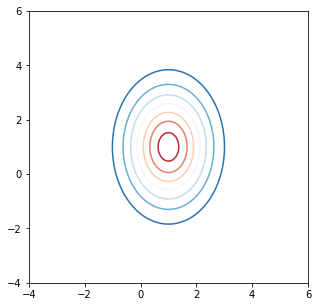

In [4]:
mu = np.array([1, 1])
sigma = np.array([[1, 0], [0, 2]])

fig, ax = plot_mvn_pdf(mu, sigma)

## 2

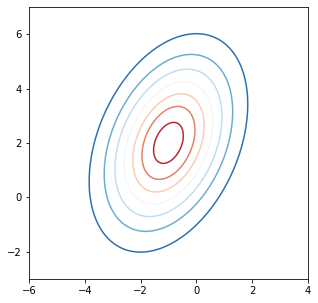

In [5]:
mu = np.array([-1, 2])
sigma = np.array([[2, 1], [1, 4]])

fig, ax = plot_mvn_pdf(mu, sigma)

## 3

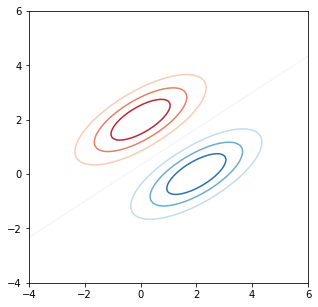

In [6]:
mu1 = np.array([0, 2])
mu2 = np.array([2, 0])
sigma = np.array([[2, 1], [1, 1]])

fig, ax = plot_mvn_pdf(mu1, sigma, mu2, sigma)

## 4

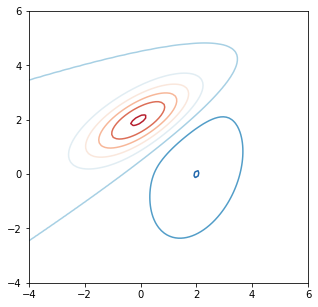

In [7]:
mu1 = np.array([0, 2])
mu2 = np.array([2, 0])
sigma1 = np.array([[2, 1], [1, 1]])
sigma2 = np.array([[2, 1], [1, 4]])

fig, ax = plot_mvn_pdf(mu1, sigma1, mu2, sigma2)

## 5

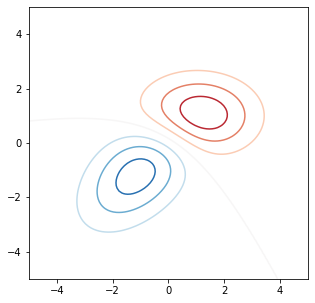

In [8]:
mu1 = np.array([1, 1])
mu2 = np.array([-1, -1])
sigma1 = np.array([[2, 0], [0, 1]])
sigma2 = np.array([[2, 1], [1, 2]])

fig, ax = plot_mvn_pdf(mu1, sigma1, mu2, sigma2)